##### In this section of the project, we have created a predictive model to predict the team most likely to win an international tournament. We have selected 10 international teams which are participating in the tourney

In [1]:
import pandas as pd

df = pd.read_csv ('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Feature selection: Analysing what could be the features that help us to determine the team most likely to win. 
1) Historical record of matches between the teams 
2) Goals scored
3) Team performance home and away for the past 50 years

- We are adding these two columns in the database to be able to create a predictive model based on these two features

In [2]:
# Adding winning team and goal difference to the dataset
import numpy as np
match_winner = []
for i in range(len(df['home_team'])):
    if df['home_score'][i] > df['away_score'][i]:
        match_winner.append(df['home_team'][i])
    elif df['home_score'][i] < df['away_score'][i]:
        match_winner.append(df['away_team'][i])
    else:
        match_winner.append('Match Tied')
df['winner'] = match_winner

# Adding goal difference as GD
df['GD'] = np.absolute(df['home_score'] - df['away_score'])

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Match Tied,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Match Tied,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


Working with a subset of the data . Here we atre analysing historical performance of one of the teams participating in the tournament(Spain)

In [3]:
df_1 = df[(df['home_team'] == 'Spain') | (df['away_team'] == 'Spain')]
spain = df_1.iloc[:]
spain.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
615,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,Spain,2
629,1922-04-30,France,Spain,0,4,Friendly,Le Bouscat,France,False,Spain,4
682,1922-12-17,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,Spain,1
689,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False,Spain,3
690,1923-02-04,Belgium,Spain,1,0,Friendly,Antwerp,Belgium,False,Belgium,1


In [4]:
# Adding a new column year to the database
year = []
for row in spain['date']:
    year.append(int(row[:4]))
spain['match_year'] = year

spain.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD,match_year
615,1921-12-18,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,Spain,2,1921
629,1922-04-30,France,Spain,0,4,Friendly,Le Bouscat,France,False,Spain,4,1922
682,1922-12-17,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,Spain,1,1922
689,1923-01-28,Spain,France,3,0,Friendly,San Sebastián,Spain,False,Spain,3,1923
690,1923-02-04,Belgium,Spain,1,0,Friendly,Antwerp,Belgium,False,Belgium,1,1923


In [5]:
# Getting the dataset to contain only matches played in the last 5 decades
spain_recent = spain[spain.match_year >= 1970]
spain_recent.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD,match_year
7366,1970-02-11,Spain,Germany,2,0,Friendly,Seville,Spain,False,Spain,2,1970
7376,1970-02-21,Spain,Italy,2,2,Friendly,Madrid,Spain,False,Match Tied,0,1970
7419,1970-04-22,Switzerland,Spain,0,1,Friendly,Lausanne,Switzerland,False,Spain,1,1970
7587,1970-10-28,Spain,Greece,2,1,Friendly,Zaragoza,Spain,False,Spain,1,1970
7614,1970-11-11,Spain,Northern Ireland,3,0,UEFA Euro qualification,Seville,Spain,False,Spain,3,1970


Text(0.5, 1.0, 'Win rate of Spain')

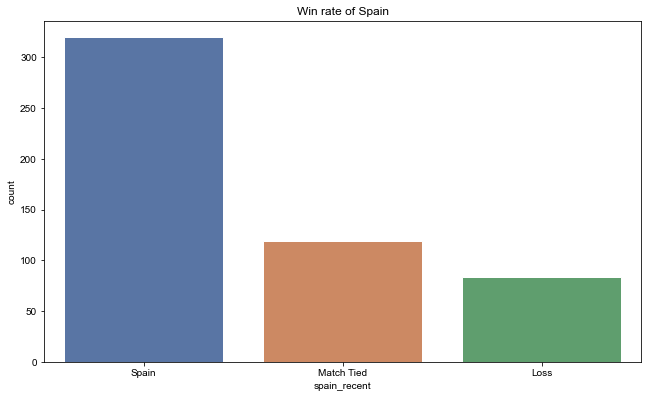

In [6]:
#Analysing the win rate for Spain in the last 50 years

import matplotlib.pyplot as plt
import seaborn as sns
wins = []
for row in spain_recent['winner']:
    if row != 'Spain' and row != 'Match Tied':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'spain_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='spain_recent', data=winsdf)
plt.title("Win rate of Spain") 

In [7]:
# We can conclude from the above graph that Spain has been brilliant in international football over the last 50 years

In [8]:
#Doing the same analysis on a different team (Croatia)
df_2 = df[(df['home_team'] == 'Croatia') | (df['away_team'] == 'Croatia')]
croatia = df_2.iloc[:]
croatia.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
2281,1940-04-02,Croatia,Switzerland,4,0,Friendly,Zagreb,Croatia,False,Croatia,4
2286,1940-04-21,Switzerland,Croatia,0,1,Friendly,Berne,Switzerland,False,Croatia,1
2288,1940-05-02,Hungary,Croatia,1,0,Friendly,Budapest,Hungary,False,Hungary,1
2317,1940-12-08,Croatia,Hungary,1,1,Friendly,Zagreb,Croatia,False,Match Tied,0
2356,1941-06-15,Germany,Croatia,5,1,Friendly,Vienna,Germany,False,Germany,4


Text(0.5, 1.0, 'Win rate of Croatia')

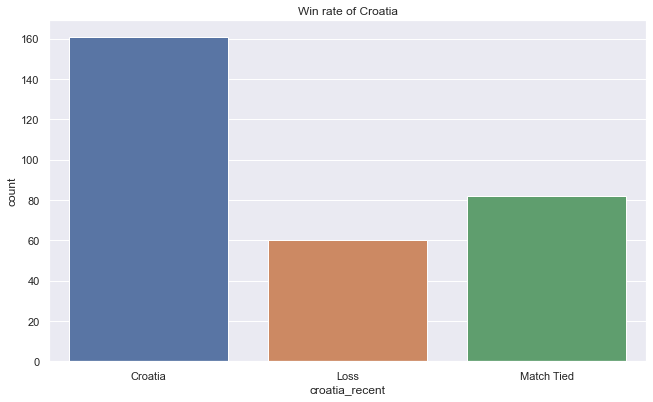

In [9]:
# Adding a new column year to the database
year = []
for row in croatia['date']:
    year.append(int(row[:4]))
croatia['match_year'] = year
croatia_recent = croatia[croatia.match_year >= 1970]
wins = []
for row in croatia_recent['winner']:
    if row != 'Croatia' and row != 'Match Tied':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'croatia_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='croatia_recent', data=winsdf)
plt.title("Win rate of Croatia") 

In [10]:
# Analysing historical matches between 2 specific teams ( Spain vs Croatia)

#Doing the same analysis on a different team (Croatia)
df_vs = df[((df['home_team'] == 'Croatia') & (df['away_team'] == 'Spain'))| ((df['home_team'] == 'Spain') & (df['away_team'] == 'Croatia')) ]
spain_vs_croatia = df_vs.iloc[:]
spain_vs_croatia.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
18214,1994-03-23,Spain,Croatia,0,2,Friendly,Valencia,Spain,False,Croatia,2
21943,1999-05-05,Spain,Croatia,3,1,Friendly,Seville,Spain,False,Spain,2
22603,2000-02-23,Croatia,Spain,0,0,Friendly,Split,Croatia,False,Match Tied,0
28363,2006-06-07,Spain,Croatia,2,1,Friendly,Geneva,Switzerland,True,Spain,1
34224,2012-06-18,Croatia,Spain,0,1,UEFA Euro,Gdańsk,Poland,True,Spain,1


Text(0.5, 1.0, 'Spain vs Croatia in the last 50 years')

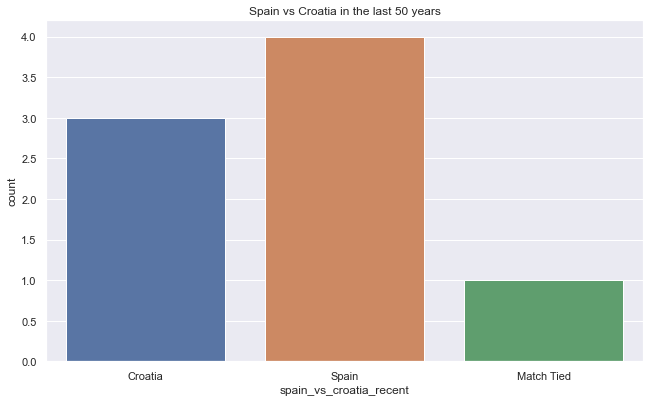

In [11]:
year = []
for row in spain_vs_croatia['date']:
    year.append(int(row[:4]))
spain_vs_croatia['match_year'] = year
spain_vs_croatia_recent = spain_vs_croatia[spain_vs_croatia.match_year >= 1970]
wins = []
for row in spain_vs_croatia_recent['winner']:
    if row != 'Croatia' and row != 'Match Tied':
        wins.append('Spain')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'spain_vs_croatia_recent'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='spain_vs_croatia_recent', data=winsdf)
plt.title("Spain vs Croatia in the last 50 years") 

In [12]:
# We can see that Spain has won more games when they have faced each other in international games over the last 50 years

The important features we have analysed till now would be used to create a predictive model which are :

a) Win rate of a team over the last 50 years
b) Teams when playing head to head with each other
c) Teams playing at Home having an advantage

We are creating a tournament with ten teams. For this analysis we will try to simulate 10 teams for a European cup competition where teams play each other home and away . There are two groups of teams. Group A and Group B. The winners of each group will play a final match to decide the winner of the tournament.

In [13]:
euro_teams = ['Italy', 'Denmark', 'Belgium', 'Netherlands', 'Spain', 'Portugal' , 'Croatia', 'Germany' , 'France','Switzerland']

In [14]:
eurocup_home = df[df['home_team'].isin(euro_teams)]
eurocup_away = df[df['away_team'].isin(euro_teams)]

In [15]:
eurocup = pd.concat((eurocup_home, eurocup_away))
eurocup.drop_duplicates()
# The eurocup sliced dataset now contains historical results for the teams participating in the tournament
eurocup.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,GD
162,1904-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False,Match Tied,0
164,1905-02-12,France,Switzerland,1,0,Friendly,Paris,France,False,France,1
172,1905-04-30,Belgium,Netherlands,1,4,Friendly,Antwerp,Belgium,False,Netherlands,3
173,1905-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False,Belgium,7
174,1905-05-14,Netherlands,Belgium,4,0,Friendly,Rotterdam,Netherlands,False,Netherlands,4


Since we have determined the outcome to depend upon the historical performance of a team over the last 50 years and how teams perform against one another, we are goling to slice the dataset to drop the columns not required for the predictive model

In [16]:
year = []
for row in eurocup['date']:
    year.append(int(row[:4]))
eurocup['match_year'] = year
eurocup_recent = eurocup[eurocup.match_year >= 1970]
eurocup_recent = eurocup_recent.drop(['date', 'neutral','home_score', 'away_score', 'tournament', 'city', 'country', 'GD', 'match_year'], axis=1)
eurocup_recent.head()

,home_team,away_team,winner
7366,Spain,Germany,Spain
7376,Spain,Italy,Match Tied
7380,Belgium,England,England
7404,France,Bulgaria,Match Tied
7405,Germany,Romania,Match Tied


Reassign the target values into into three categorical values 0, 1, and 2

The winner column will show :
2: Home team victory
1: Tied Match
0: Away Team victory

In [17]:
eurocup_recent.loc[eurocup_recent.winner == eurocup_recent.home_team,'winner']=2
eurocup_recent.loc[eurocup_recent.winner == 'Match Tied', 'winner']=1
eurocup_recent.loc[eurocup_recent.winner == eurocup_recent.away_team, 'winner']=0
eurocup_recent = eurocup_recent.reset_index(drop=True)
eurocup_recent2 = eurocup_recent
eurocup_recent.head()

,home_team,away_team,winner
0,Spain,Germany,2
1,Spain,Italy,1
2,Belgium,England,0
3,France,Bulgaria,1
4,Germany,Romania,1


In [18]:
# Converting the data to continous input to apply regression on the data to make predictions

euro_cup_predict = pd.get_dummies(eurocup_recent, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [19]:
#Split the dataset into training and test sets (70,30)
from sklearn.model_selection import train_test_split

X = euro_cup_predict.drop(['winner'], axis=1)
y = euro_cup_predict["winner"]
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
X_train.head()

,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Belarus,...,away_team_Tahiti,away_team_Tunisia,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Venezuela,away_team_Wales,away_team_Yugoslavia
2897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we will apply different regression techniques on the database to abe able to generate a predictive model. We have applied logistic regression and also the Decision tree classifier

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
score = logistic_regression.score(X_train, y_train)
score2 = logistic_regression.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.590
Test set accuracy:  0.574


In [21]:
predictions = logistic_regression.predict(X_test)
print("Training Accuracy: {0:.2f}".format(logistic_regression.score(X_train, y_train)))

Training Accuracy: 0.59


In [22]:
##Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [23]:
# Report the tree depth, number of leaves
from sklearn.metrics import accuracy_score
Td = clf.get_depth()
print("Tree depth is:" ,Td)
print("No of leaves is:",clf.get_n_leaves())
games_pred = clf.predict(X_test)
print ("Accuracy for decision tree is ", accuracy_score(y_test,games_pred)*100)
print("Training Accuracy: {0:.2f}".format(clf.score(X_train, y_train)))

Tree depth is: 75
No of leaves is: 793
Accuracy for decision tree is  51.9781718963165
Training Accuracy: 0.71


The decision tree classifier shows better training accuracy so we will use this to predict the games in our tournament.

In [24]:
# Now we will apply the predictions on the tournament
fixtures = pd.read_csv('tournament.csv')

In [25]:
fixtures.head()

,Round Number,Home Team,Away Team,Group,Result
0,1,Italy,Denmark,Group A,NaN
1,1,Denmark,Italy,Group A,NaN
2,1,Italy,Belgium,Group A,NaN
3,1,Belgium,Italy,Group A,NaN
4,1,Italy,Netherlands,Group A,NaN


In [26]:
# List for storing the group stage games
pred_set = []
for index, row in fixtures.iterrows():
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winner': None})
        
pred_set = pd.DataFrame(pred_set)
pred_set2 = pred_set

pred_set.head()

,home_team,away_team,winner
0,Italy,Denmark,None
1,Denmark,Italy,None
2,Italy,Belgium,None
3,Belgium,Italy,None
4,Italy,Netherlands,None


In [27]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Make it similar to the trained model dataset
missing_cols = set(euro_cup_predict.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[euro_cup_predict.columns]
pred_set = pred_set.drop(['winner'], axis=1)
pred_set.head()

,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Belarus,...,away_team_Tahiti,away_team_Tunisia,away_team_Turkey,away_team_Ukraine,away_team_United Arab Emirates,away_team_United States,away_team_Uruguay,away_team_Venezuela,away_team_Wales,away_team_Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
games_pred = clf.predict(pred_set)
games_pred

array([2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2])

In [38]:
#SImulating the group matches and creating a points table

points_table = {'key': 'value'}
for i in range(fixtures.shape[0] -1 ):
    print(pred_set2.iloc[i, 1] + " and " + pred_set2.iloc[i, 0])
    if games_pred[i] == 2:
        print("Winner: " + pred_set2.iloc[i, 1])
        if pred_set2.iloc[i, 1] in points_table:
            points_table[pred_set2.iloc[i, 1]] = points_table[pred_set2.iloc[i, 1]]+3
        else:
            points_table[pred_set2.iloc[i, 1]] = 3
    elif games_pred[i] == 1:
        print("Match Tied")
        if pred_set2.iloc[i, 0] in points_table:
            points_table[pred_set2.iloc[i, 0]] = points_table[pred_set2.iloc[i, 0]]+1
        else:
            points_table[pred_set2.iloc[i, 0]] = 1
        if pred_set2.iloc[i, 1] in points_table:
            points_table[pred_set2.iloc[i, 1]] = points_table[pred_set2.iloc[i, 1]]+1
        else:
             points_table[pred_set2.iloc[i, 1]] = 1
    elif games_pred[i] == 0:
        print("Winner: " + pred_set2.iloc[i, 0])
        
        if pred_set2.iloc[i, 0] in points_table:
            points_table[pred_set2.iloc[i, 0]] = points_table[pred_set2.iloc[i, 0]]+3
        else:
            points_table[pred_set2.iloc[i, 0]] = 3
    print ("\n")

Denmark and Italy
Winner: Denmark


Italy and Denmark
Winner: Denmark


Belgium and Italy
Match Tied


Italy and Belgium
Winner: Belgium


Netherlands and Italy
Winner: Netherlands


Italy and Netherlands
Winner: Netherlands


Spain and Italy
Winner: Spain


Italy and Spain
Winner: Italy


Belgium and Denamrk
Winner: Denamrk


Denmark and Belgium
Winner: Denmark


Netherlands and Denamrk
Winner: Denamrk


Denmark and Netherlands
Match Tied


Spain and Denamrk
Winner: Denamrk


Denmark and Spain
Winner: Denmark


Netherlands and Belgium
Match Tied


Belgium and Netherlands
Winner: Belgium


Spain and Belgium
Winner: Belgium


Belgium and Spain
Winner: Belgium


Spain and Netherlands
Winner: Spain


Netherlands and Spain
Winner: Spain


Croatia and Portugal
Winner: Croatia


Germany and Portugal
Winner: Portugal


France and Portugal
Winner: Portugal


Switzerland and Portugal
Winner: Switzerland


Spain and Croatia
Winner: Spain


Germany and Croatia
Winner: Croatia


France and Croatia

In [53]:
# Here is how the points table look like after the tournament:

i=1;
print("Points Table :\n**************\n")
for key, value in points_table.items():
    print(key, ' : ', value)
    print("\n")

Points Table :
**************

key  :  value


Denmark  :  13


Italy  :  4


Belgium  :  14


Netherlands  :  8


Spain  :  12


Denamrk  :  9


Croatia  :  13


Portugal  :  12


Switzerland  :  10


France  :  6


Germany  :  3




In [54]:
#We can conclude that Croatia and Belgium topped the respective groups based on the group matches results